# Project 2
## General notes
Given two data sets:
- MNIST (same as from project 1). 
    - 9 classes, digits {-9, -2, 0, 1, 2, 5, 6, 8, 9}.
    - There are 2000 images of numbers.
    - Each image is 16x16. 
    - The data set has dimention 2000x256 (=51200). 
- Cats and Dogs data set.
    - 2 classes (binary), cats and dogs.
    - 99 images of cats and 99 images of dogs.
    - Each image is 64x64 (high-dimensional).
    - The data set has dimension 198x4096 (=811008).
    - OBS! THe given data set doesn't contain any labels as the MNIST data set does. The first 98 data points are cats and the lateral 98 data points are dogs.

In [19]:
# Import packages and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import data sets
MNIST = pd.read_csv('Numbers.txt', sep=r'\s+')
CATSDOGS = pd.read_csv('catdogdata.txt', sep=r'\s+')

### MNIST data set inspection


Number of data points: 2000
Image resolutions: 256

Frequency distribution:
Label -9: 189 samples
Label -2: 221 samples
Label 0: 349 samples
Label 1: 307 samples
Label 2: 200 samples
Label 5: 186 samples
Label 6: 201 samples
Label 8: 168 samples
Label 9: 179 samples


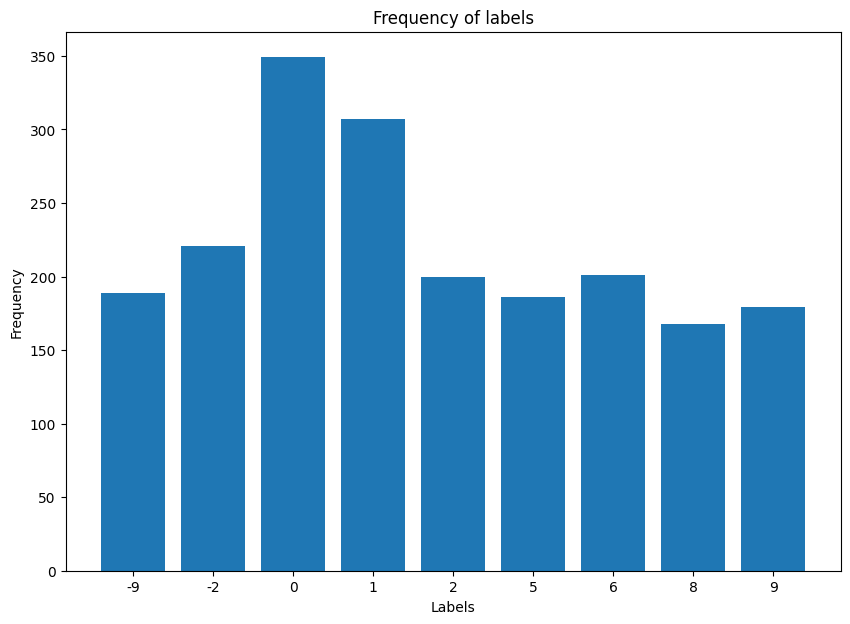

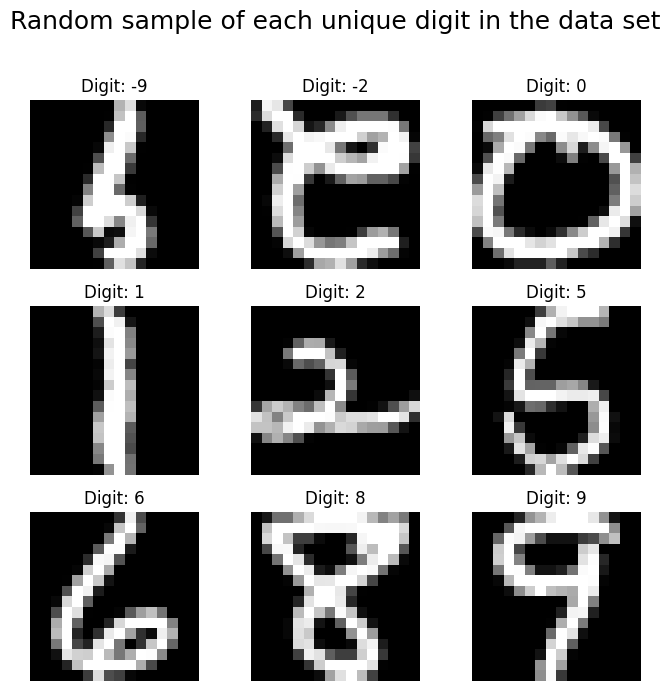

In [10]:
# Inspecting the MNIST data set, printing some observations and creating some 
# figures (from poject 1).

# Seperate labels from data
MNIST_labels = MNIST["V1"].values
MNIST_pixels = MNIST.iloc[:, 1:].values
print("\nNumber of data points: " + str(round(MNIST_pixels.shape[0])))
print("Image resolutions: " + str(round(MNIST_pixels.shape[1])))

# Print digit label distribution
print("\nFrequency distribution:")
MNIST_unique_labels, MNIST_counts = np.unique(MNIST_labels, return_counts=True)
for label, count in zip(MNIST_unique_labels, MNIST_counts):
    print("Label " + str(label) + ": " + str(count) + " samples")

# Define x positions
x_positions = np.arange(len(MNIST_unique_labels))
plt.figure(figsize=(10, 7))
plt.bar(x_positions, MNIST_counts)
plt.xticks(x_positions, MNIST_unique_labels)
plt.xlabel("Labels")
plt.ylabel("Frequency")
plt.title("Frequency of labels")
plt.show()

# Select one random example for each digit label
fig, axes = plt.subplots(3, 3, figsize=(7, 7))
axes = axes.flatten()
indx = 0
for lab in MNIST_unique_labels:
    indices = np.where(MNIST_labels == lab)[0]
    random_index = np.random.choice(indices)
    pixels_index = MNIST_pixels[random_index]
    reshaped_data = pixels_index.reshape(16, 16)
    axes[indx].imshow(reshaped_data, cmap='gray', vmin=-1, vmax=1)
    axes[indx].set_title("Digit: " + str(lab))
    axes[indx].axis('off')
    indx = indx + 1

plt.tight_layout()
plt.suptitle(
    "Random sample of each unique digit in the data set", fontsize=18
)
plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

### Cats and Dogs data set inspection


Number of data points: 198
Image resolutions: 4096


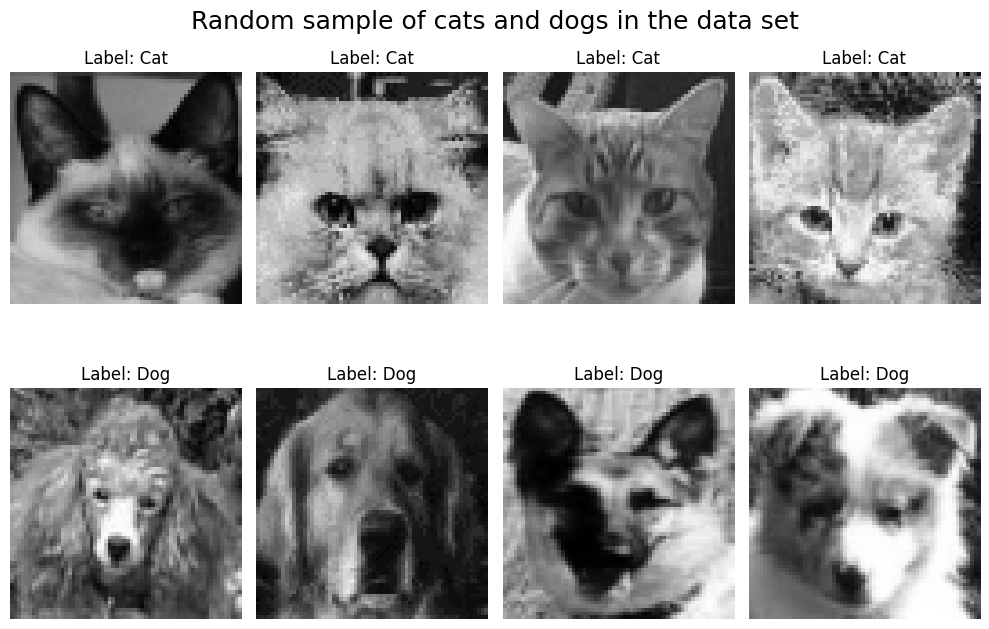

In [45]:
# Inspecting the cats and dogs data set, printing some observations and creating some 
# figures. The first 98 data points are cats and the lateral 98 data points are dogs.

# Seperate labels from data
CATSDOGS_labels = ["Cat"]*98 + ["Dog"]*98
CATSDOGS_pixels = CATSDOGS.iloc[:, :].values
print("\nNumber of data points: " + str(round(CATSDOGS_pixels.shape[0])))
print("Image resolutions: " + str(round(CATSDOGS_pixels.shape[1])))

# Plot 4 random cats and 4 random dogs
label_list = ["Cat"]*4 + ["Dog"]*4
fig, axes = plt.subplots(2, 4, figsize=(10, 7))
axes = axes.flatten()
indx = 0
for lab in label_list:
    indices = np.where([labels == lab for labels in CATSDOGS_labels])[0]
    random_index = np.random.choice(indices)
    pixels_index = CATSDOGS_pixels[random_index]
    reshaped_data = pixels_index.reshape(64, 64)
    reshaped_data = np.rot90(reshaped_data, k=-1)
    axes[indx].imshow(reshaped_data, cmap='gray', vmin=0, vmax=256)
    axes[indx].set_title("Label: " + str(lab))
    axes[indx].axis('off')
    indx = indx + 1

plt.tight_layout()
plt.suptitle(
    "Random sample of cats and dogs in the data set", fontsize=18
)
plt.show()


## Part 1
3 classifiers and 2 feature selection methods.
For each of the two data sets we want to answer,
1. Using cross-validation, determine how many features (pixels) you need for classification. Does the optimal number of features differ betweeen the approaches?
2. Which pixels are selected? Does this differ between approaches/classification methods? Why?
3. Repeat a couple of times, is the selection stable? Are the number of features needed and/or which pixels are chosen is roughly the same across multiple runs.

### Notes from lectures
Feature selection can be addressed in different ways:
- Pre-processing (filtering):
    - Crude, but fast
    - Typically only pays attention to one or two features at a time or does not take the outcome variable into consideration.
    - PCA, F-score, MIC.
- Wrapping:
    - Determine the best set of features by fitting models of different complexity and comparing their performance.
    - Best subset selection: Try all possible subsets of features and compare model performance with e.g. cross validation.
    - Forward selection: Start with just an intercept and add in each step the variable that improves the most (greedy algorithm).
    - Backward selection: Start with all variables and then remove the variable with the least impact (greedy algorithm).
    - Computationally very heavy
- Embeded:
    - Embed the feature selection into the model estimation procedure.
    - Ideally, penalization on the number of included features.
    - Lasso/elastic net.
    - Naive form is equally computationally heavy as wrapping

### Workflow
Classifiers:
1. Random Forest (RF)
2. ...
3. ...

Pre-processing:
- Normalize data
- PCA?

Use 1 wrapper with "SequentialFeatureSelector" forward/backward

### Pre-processing

In [ ]:
# Normalize data
# PCA?

## Part 2